## Background Information
#### i. Data and Goals
I am using UFS Prototype 7 reforecast data for Precipitation and Temperature over the contiguous United States (CONUS), initialized July 1st 2011-2017 to see if there is a correlation between midsummer precipitation and temperature anomalies with El Nino and La Nina years in the reforecasts, and to compare that data with neutral years. 

#### ii. Further Background of Data
UFS P7 is one of the experimental versions of the UFS Global Coupled Model (GCM), which contains S2S reforecast data, and includes variables for atmosphere, land, sea ice, and ocean waves. The retrospective runs were from 2011-2018, and initialized on the 1st and 15th of every month (168 forecasts in total), with a forecast length of 35 days and output frequency of 6 hours. The dataset is in the format of netCDF files, and I imported them from COLA. The COLA data was downloaded by Hedanqiu Bai, and was pre-processed for precipitation ['precip'], temperature ['ts'], and 500hPa geopotential height ['z500'] for the corresponding days of each month as hourly steps, instead of the 35 day forecasts. 
* https://vlab.noaa.gov/web/ufs-r2o/gcm-prototypes

#### iii. Background Research
The project I am working as a GRA for is researching the prediction of extreme events in precipitation and temperature over CONUS during boreal summer using UFS P7 with Dr. Stan. It is a continuation of the paper "Prediction of extreme events in precipitation and temperature over CONUS during boreal summer in the UFS coupled model" by Krishnamurthy, V; Stan, C. (10.1007/s00382-021-06120-0.)

For this class, I am interested specifically in the July 01 data from 2011 to 2017 over CONUS, and exploring whether there is a correlation in anomalies that align with ENSO. The reason I am interested in exploring this correlation is because ENSO is a very relevant and important research area in climate science (a staple, if you will). Furthermore, if summer temperature and precipitation anomalies can become better predicted in general by models like UFS, then including a correlation to ENSO could help predict future ENSO events by following these trends. 

As this is not a new area of research, there are many studies conducted that will be beneficial in providing information, results, errors, and extensions of study. 
Some papers that I have looked at so far include:
* https://link.springer.com/article/10.1007/s00382-021-06120-0 (Prediction of extreme events in precipitation and temperature over CONUS during boreal summer in the UFS coupled model)
* https://hess.copernicus.org/articles/26/4233/2022/ (Quantifying overlapping and differing information of global precipitation for GCM forecasts and El Niño–Southern Oscillation)
* https://www.nature.com/articles/s41612-018-0013-0 (The sub-seasonal to seasonal prediction project (S2S) and the prediction of extreme events)
* https://journals.ametsoc.org/view/journals/mwre/149/9/MWR-D-21-0020.1.xml (Tropical Origins of Weeks 2–4 Forecast Errors during the Northern Hemisphere Cool Season) 
* https://ui.adsabs.harvard.edu/abs/2021AGUFM.A43H..01M/abstract (Improving S2S precipitation forecasts in UFS through Tropical Nudging and Explainable Machine Learning)

## Assignment 1.A

#### Read Data into Notebook
Since the data I am using is located on COLA, I copied it from COLA to Hopper and have it currently in my scratch directory (I will move it to my home directory ASAP). 

Once the data is on Hopper, the first step is to read it into the notebook so I can look at it.

In [1]:
#xarray used to open the datasets
#matplotlib and ccrs used for plots and maps to make the data visual
#datetime will be used to convert the hour steps to datetime float instead of objects
    #once i figure that out

import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [2]:
#construct path and file labels 

path = '/scratch/ldoyle4/clim680_dataset/'
years = ['2011','2012','2013','2014','2015','2016','2017']
files = [f'ufs_p7_{year}0701.nc' for year in years]

In [3]:
files

['ufs_p7_20110701.nc',
 'ufs_p7_20120701.nc',
 'ufs_p7_20130701.nc',
 'ufs_p7_20140701.nc',
 'ufs_p7_20150701.nc',
 'ufs_p7_20160701.nc',
 'ufs_p7_20170701.nc']

In [4]:
f_11 = 'ufs_p7_20110701.nc'
f_12 = 'ufs_p7_20120701.nc'
f_13 = 'ufs_p7_20130701.nc'
f_14 = 'ufs_p7_20140701.nc'
f_15 = 'ufs_p7_20150701.nc'
f_16 = 'ufs_p7_20160701.nc'
f_17 = 'ufs_p7_20170701.nc'

In [5]:
#open the datasets
#this will be be constructed as a forloop eventually

d_11 = xr.open_dataset(path+f_11)
d_12 = xr.open_dataset(path+f_12)
d_13 = xr.open_dataset(path+f_13)
d_14 = xr.open_dataset(path+f_14)
d_15= xr.open_dataset(path+f_15)
d_16= xr.open_dataset(path+f_16)
d_17 = xr.open_dataset(path+f_17)

In [6]:
#open a dataset, to see what it looks like
#every dataset should have 125 steps, 721 lat, 1440 long, ts, precip, and z500
#pay attention to lat and long because this is a global lat-long grid

d_11

<xarray.Dataset>
Dimensions:    (steps: 125, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * steps      (steps) object '000' '006' '012' '018' ... '732' '738' '744'
Data variables:
    ts         (steps, latitude, longitude) float64 ...
    precip     (steps, latitude, longitude) float64 ...
    z500       (steps, latitude, longitude) float64 ...

#### Further Pre-Procesing
I am looking at precipitation and temperature over CONUS. I will be subsetting the datasets for temperature and precipitation, and then slicing for the correct latitude and longitude. For now, I am using approximations of the latitude and longitude boundaries, but plan on making them more accurate in the future to not include Canada and Mexico. 

Source I found for the bounds came from https://www.nco.ncep.noaa.gov/pmb/docs/on388/tableb.html#GRID197. (When I tried doing it without any reference, my coordinates landed me in the middle of the Indian Ocean!)

In [7]:
#create new datasets with only precip and temp
#slice for correct lat and long
#export as new netcdf files (maybe concat, im not sure yet)

In [8]:
#subset the datasets for the correct variables
#again, I want to right this as a forloop eventually
#the number label corresponds with the year 

d_11 = d_11[['ts','precip']]
d_12 = d_12[['ts','precip']]
d_13 = d_13[['ts','precip']]
d_14 = d_14[['ts','precip']]
d_15 = d_15[['ts','precip']]
d_16 = d_16[['ts','precip']]
d_17 = d_17[['ts','precip']]

In [9]:
#open one to see what it looks like

d_11

<xarray.Dataset>
Dimensions:    (steps: 125, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * steps      (steps) object '000' '006' '012' '018' ... '732' '738' '744'
Data variables:
    ts         (steps, latitude, longitude) float64 ...
    precip     (steps, latitude, longitude) float64 ...

In [10]:
#open one as a data array to see what it looks like
#as an example, I've opened d_11 for temperature

d_11.ts

<xarray.DataArray 'ts' (steps: 125, latitude: 721, longitude: 1440)>
[129780000 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * steps      (steps) object '000' '006' '012' '018' ... '732' '738' '744'

In [11]:
#create datasets that correspond to CONUS lat long
#label indicates year and region

d11_us=d_11.sel(longitude=slice(230,300),latitude=slice(60,20))
d12_us=d_12.sel(longitude=slice(230,300),latitude=slice(60,20))
d13_us=d_13.sel(longitude=slice(230,300),latitude=slice(60,20))
d14_us=d_14.sel(longitude=slice(230,300),latitude=slice(60,20))
d15_us=d_15.sel(longitude=slice(230,300),latitude=slice(60,20))
d16_us=d_16.sel(longitude=slice(230,300),latitude=slice(60,20))
d17_us=d_17.sel(longitude=slice(230,300),latitude=slice(60,20))

#from here, you can open data arrays for the specific variables 

In [12]:
#edit: i did these as seperate files, originally, but I feel that's a little excessive
#however, I'm keeping it in the code incase I want to export these as netCDFs later
#label indicates year, region, and variable

d11_us_ts=d_11['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))
d12_us_ts=d_12['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))
d13_us_ts=d_13['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))
d14_us_ts=d_14['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))
d15_us_ts=d_15['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))
d16_us_ts=d_16['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))
d17_us_ts=d_17['ts'].sel(longitude=slice(230,300),latitude=slice(60,20))

In [13]:
d11_us_precip=d_11['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))
d12_us_precip=d_12['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))
d13_us_precip=d_13['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))
d14_us_precip=d_14['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))
d15_us_precip=d_15['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))
d16_us_precip=d_16['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))
d17_us_precip=d_17['precip'].sel(longitude=slice(230,300),latitude=slice(60,20))

In [14]:
#Also, for some reason that I cannot remember right now, I included contour plots for 
#time average of d11_us_ts, outside of the contour plot section
#I might remember why later, so I'm keeping the code as comments.

#d11_us_tsmean=d11_us_ts.mean(dim='steps')
#d11_us_pmean=d11_us_precip.mean(dim='steps')
#plt.contourf(d11_us_tsmean)
#plt.colorbar() 

In [15]:
#fig = plt.figure(figsize=(11,8.5))
#ax=plt.axes(projection=ccrs.PlateCarree())
#ax.contourf(d11_us_ts['longitude'], d11_us_ts['latitude'], d11_us_tsmean,
            #transform = ccrs.PlateCarree())
#ax.coastlines() 
#;

#fig = plt.figure(figsize=(11,8.5))
#ax=plt.axes(projection=ccrs.PlateCarree())
#ax.contourf(d11_us_precip['longitude'], d11_us_precip['latitude'], d11_us_pmean,
            #transform = ccrs.PlateCarree())
#ax.coastlines() 
#;

#### Contour plots of first time step
I made a contour plot for the first time step (in this case, the first hour) from each year 2011-2017. I constructed the contour plots in grids using the subplot function from matplotlib.

Text(0.5, 1.0, '2017 temp')

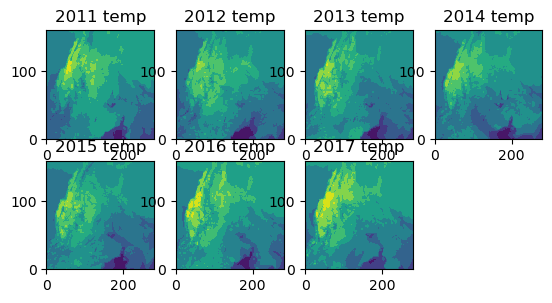

In [16]:
plt.subplot(3,4,1)
plt.contourf(d11_us['ts'][0,:,:])
plt.title('2011 temp')
plt.subplot(3,4,2)
plt.contourf(d12_us['ts'][0,:,:])
plt.title('2012 temp')
plt.subplot(3,4,3)
plt.contourf(d13_us['ts'][0,:,:])
plt.title('2013 temp')
plt.subplot(3,4,4)
plt.contourf(d14_us['ts'][0,:,:])
plt.title('2014 temp')
plt.subplot(3,4,5)
plt.contourf(d15_us['ts'][0,:,:])
plt.title('2015 temp')
plt.subplot(3,4,6)
plt.contourf(d16_us['ts'][0,:,:])
plt.title('2016 temp')
plt.subplot(3,4,7)
plt.contourf(d17_us['ts'][0,:,:])
plt.title('2017 temp')

Text(0.5, 1.0, '2017 precip')

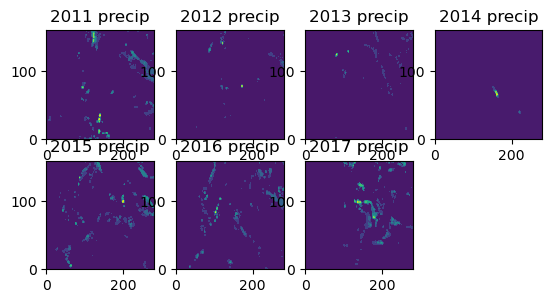

In [17]:
plt.subplot(3,4,1)
plt.contourf(d11_us['precip'][0,:,:])
plt.title('2011 precip')
plt.subplot(3,4,2)
plt.contourf(d12_us['precip'][0,:,:])
plt.title('2012 precip')
plt.subplot(3,4,3)
plt.contourf(d13_us['precip'][0,:,:])
plt.title('2013 precip')
plt.subplot(3,4,4)
plt.contourf(d14_us['precip'][0,:,:])
plt.title('2014 precip')
plt.subplot(3,4,5)
plt.contourf(d15_us['precip'][0,:,:])
plt.title('2015 precip')
plt.subplot(3,4,6)
plt.contourf(d16_us['precip'][0,:,:])
plt.title('2016 precip')
plt.subplot(3,4,7)
plt.contourf(d17_us['precip'][0,:,:])
plt.title('2017 precip')

## Assignment 1.B
#### Plot dataset on a map

I'm going to map July 2011.
I will be starting by mapping the global data, and then from there map the boundaries for CONUS.

The reason I am only doing 2011 is because I have not concatenated my data into 1 file yet. Once I do that, I will come back here and make those edits.

The reason I am mapping the global data first is because it is important to understand the scope of information that this data actually contains, but mostly because I think the distribution across the equator for both temperature and precipitation looks really cool.

In [18]:
#take the average over time for the entire dataset

d_11_mean=d_11.mean(dim='steps')

''

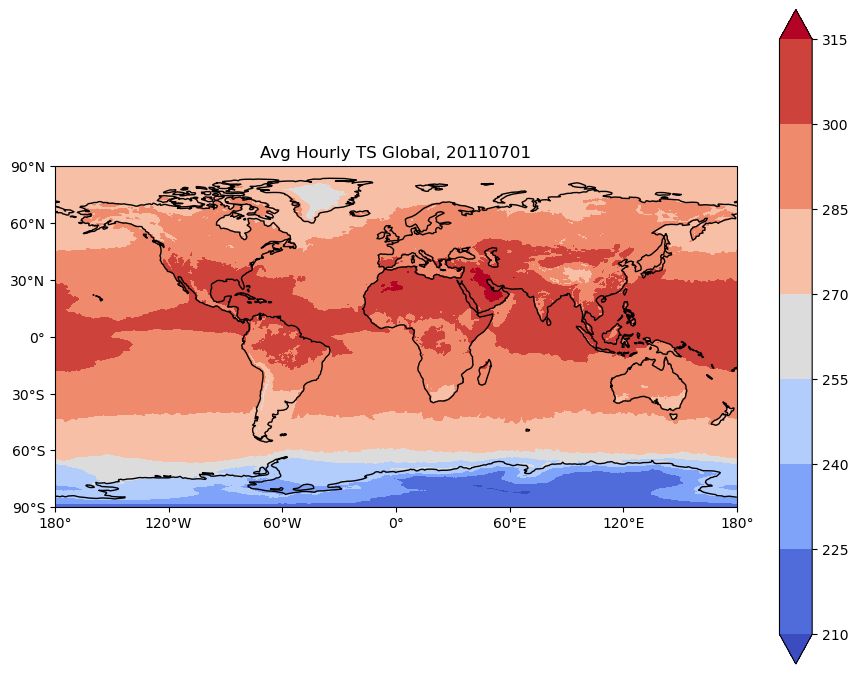

In [19]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contourf(d_11['longitude'], d_11['latitude'], d_11_mean['ts'],
            transform = ccrs.PlateCarree(), cmap='coolwarm', extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.title('Avg Hourly TS Global, 20110701')

cbar = plt.colorbar(cs) 

ax.coastlines() 
;

''

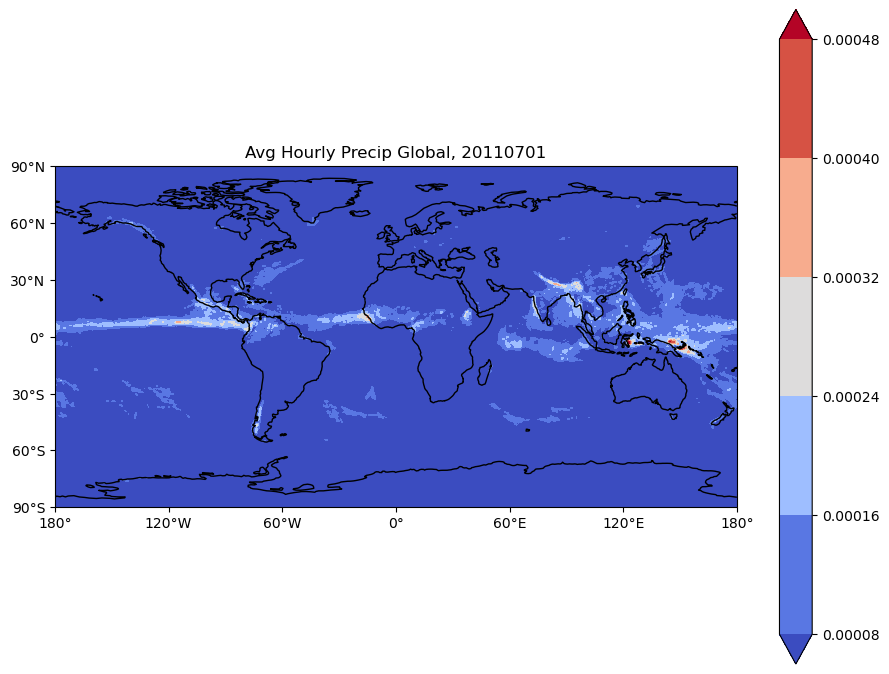

In [20]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contourf(d_11['longitude'], d_11['latitude'], d_11_mean['precip'],
            transform = ccrs.PlateCarree(), cmap='coolwarm', extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.title('Avg Hourly Precip Global, 20110701')

cbar = plt.colorbar(cs) 

ax.coastlines() 
;

Something interesting to note here is that the temperature seems to be highest in the tropics from about -30 to 30 degrees latitude. The precipitation however seems to be highest in the region about 0 to 5 degrees latitude, with regions of higher precip along the coastal regions of the Eastern and Western Pacific continental boundaries, and a bit around Continental South Asia. 
2011 was notable because it was coming out of a moderate El Nino year, and beginning a moderate La Nina year. 

Now, time for the CONUS maps.

In [21]:
#take the average over time for the CONUS bounded data
#in my original code, I used the individually subsetted files
#I'm keeping them for now, but in the future I want to edit that

d11_us_tsmean=d11_us_ts.mean(dim='steps')
d11_us_pmean=d11_us_precip.mean(dim='steps')

''

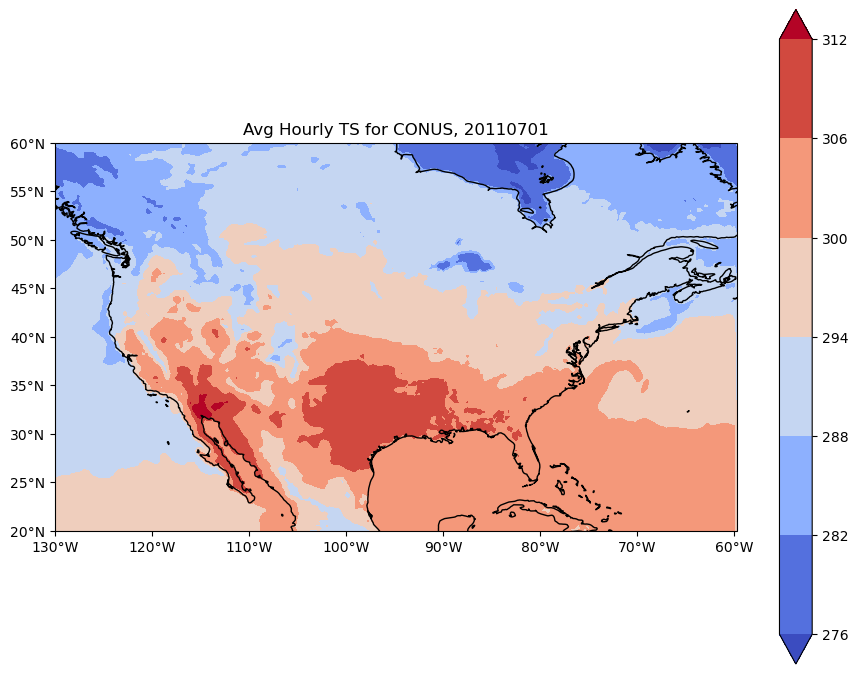

In [22]:
#plot the map for temperature
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=d11_us_tsmean
data, lons = add_cyclic_point(data, coord=d11_us_ts['longitude'])

cs=ax.contourf(lons, d11_us_ts['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm', extend='both')

ax.coastlines()

ax.set_xticks(np.arange(-130,-50,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(20,61,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs) 

plt.title('Avg Hourly TS for CONUS, 20110701')
;

''

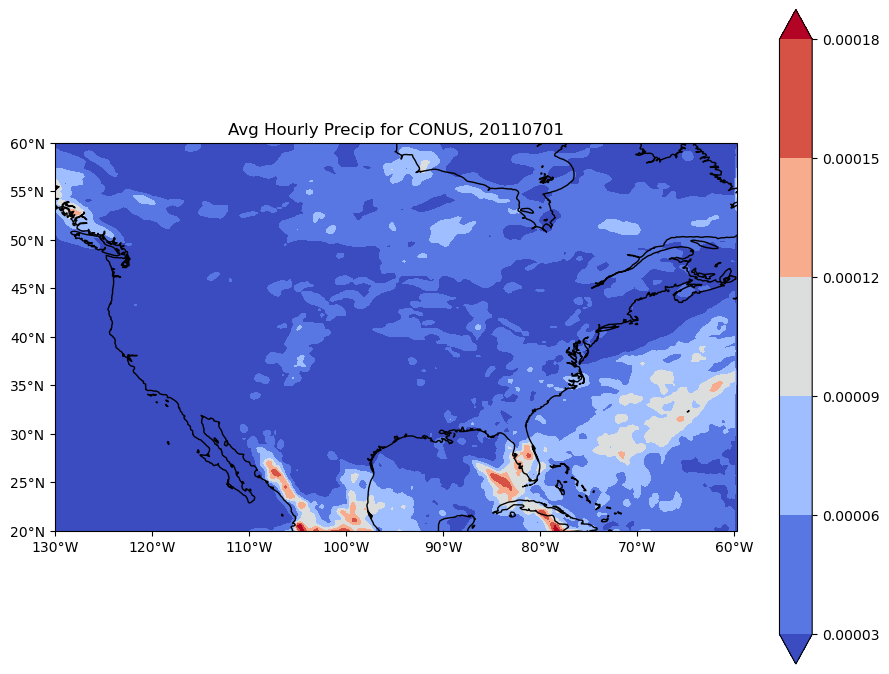

In [23]:
#plot the map for precipitation
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=d11_us_pmean
data, lons = add_cyclic_point(data, coord=d11_us_precip['longitude'])

cs=ax.contourf(lons, d11_us_precip['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm', extend='both')

ax.coastlines()

#ax.set_extent

ax.set_xticks(np.arange(-130,-50,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(20,61,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs) 

plt.title('Avg Hourly Precip for CONUS, 20110701')
;

Something interesting to note for these plots are the highest temperatures in Texas and actually the entire Southern boundary of CONUS, and the high precipitation in Florida, specifically in Central Florida.

# Errors

First place I experienced errors was in trying to figure out how to convert the steps to a datetimeFLoat. Because of the structure of the steps (hourly), I wanted to convert that to days so that I could compute daily means. I researched and tried a few different things, but could not figure it out. I will continue to work on this.

The other place I experienced errors was in getting the x axis labels to show up on my maps of CONUS. 
I figured out that it was because I was not making the bounds negative, therefore they weren't showing up in the data range. Since, 0 degrees starts on the prime meridian (around mid Atlantic), everything to the left of that is going to be negative.

# Improvements to be made

Some things I'd like to change and improve in this project are implementing for loops when opening, subsetting, and aggregating the datafiles. I'm not comfortable concatenating them yet (also when I tried the kernel reset, so I'm going to wait until I cut down on the memory a bit more). 

I also want to export the subsetted and aggregated datasets as new netCDFs to replace the ones in my scratch directory. I also need to transfer the data in my scratch directory to my home directory, and reflect that change in my code.

I would like to make my contour plots a little more spaced, so that the axes and titles are actually legible.

Another thing I need to change is making my CONUS bounds more accurate. Right now it includes Canada and most of Mexico, which would also help make my datafiles smaller, and save disk space.